In [1]:
import librosa
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import IPython.display as ipd
import music21 as m21
import sys
import IPython
from IPython.core.display import display, HTML, Javascript
import json, random

In [2]:
import keras
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from livelossplot import PlotLossesKeras
from keras.models import model_from_json

Using TensorFlow backend.


In [3]:
def load_NN(name):
    with open(name + "_NN_architecture.json", 'r') as json_file:
        model = model_from_json(json_file.read())
    model.load_weights(name + "_NN_weights.h5")
    model.summary()
    return model

In [4]:
model = load_NN("../Single_note_models/Guitar/Guitar")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               128256    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 61)                7869      
Total params: 169,021
Trainable params: 169,021
Non-trainable params: 0
_______________

In [5]:
y, sr = librosa.load("../Samples/Guitar/Riffs/Guitar_noamp_riff1.mp3", mono=False)
y = librosa.core.to_mono(y)
y = librosa.resample(y, sr, 8000)

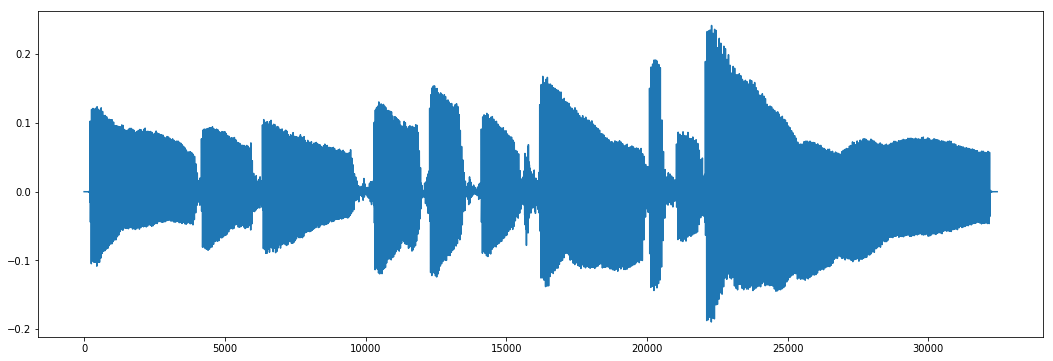

In [30]:
plt.figure(figsize=(18,6))
plt.plot(y)

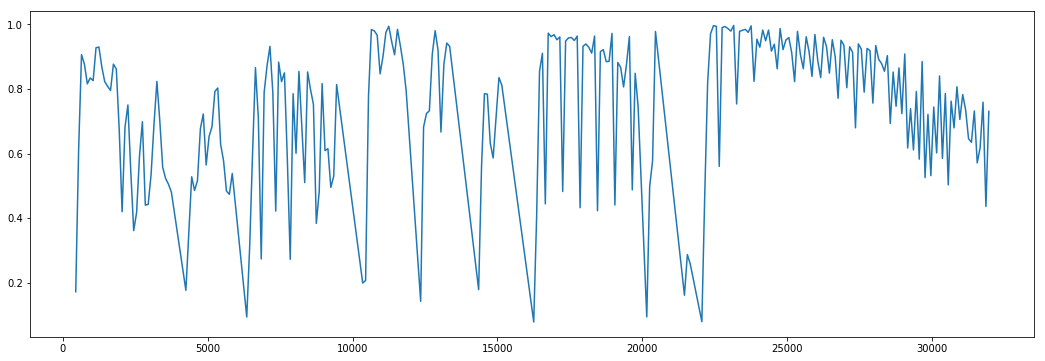

In [107]:
a = []
b = []
old = 1
for i in tqdm(range(0, len(y)-500, 100)):
    frame = y[i:i+500]
    frame_data = pd.DataFrame({'x{}'.format(i): [frame[i]] for i in range(500)})
    new = np.max(model.predict(frame_data))
    if (new > 0.2) and (old > 0.2):
        a.append(i+250)
        b.append(older)
    older = old
    old = new

plt.figure(figsize=(18,6))
plt.plot(a,b)

In [108]:
a = np.array(a)
b = np.array(b)

In [109]:
a[b < 0.2]

array([  450,  4250,  6350, 10350, 12350, 14350, 16250, 20150, 21450,
       22050])

In [111]:
def round_dur(x, base):
    return base * round(x/base)

In [113]:
e = []
for f in a[b < 0.2]:
    e.append(round_dur(f, 1000))

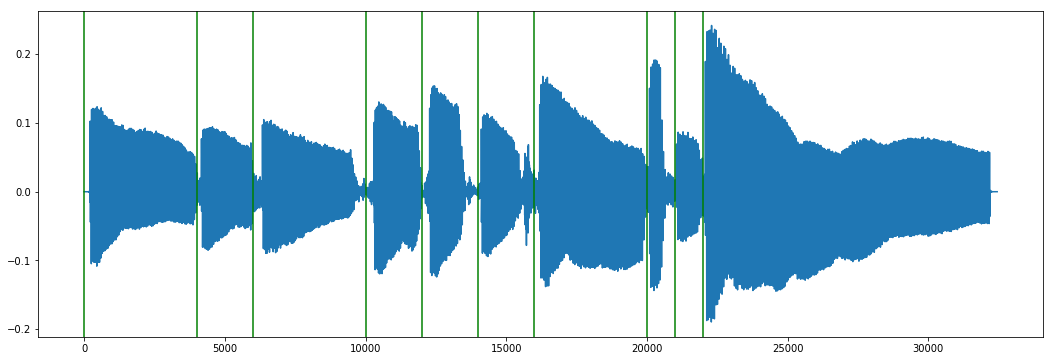

In [114]:
plt.figure(figsize=(18,6))
plt.plot(y)
for i in e:
    plt.axvline(x=i, color="g")

In [134]:
def onset(file):
    y, sr = librosa.load(file, mono=False)
    y = librosa.core.to_mono(y)
    y = librosa.resample(y, sr, 8000)
    
    a = []
    b = []
    old = 1
    older = 1
    for i in tqdm(range(0, len(y)-500, 100)):
        frame = y[i:i+500]
        frame_data = pd.DataFrame({'x{}'.format(i): [frame[i]] for i in range(500)})
        new = np.max(model.predict(frame_data))
        if (new > 0.2) and (old > 0.2):
            a.append(i+250)
            b.append(older)
        older = old
        old = new
        
    a = np.array(a)
    b = np.array(b)
    c = []
    for f in a[b < 0.2]:
        c.append(round_dur(f, 1000))
        
    plt.figure(figsize=(18,6))
    plt.plot(y)
    for i in c:
        plt.axvline(x=i, color="g")
    return a,b,c

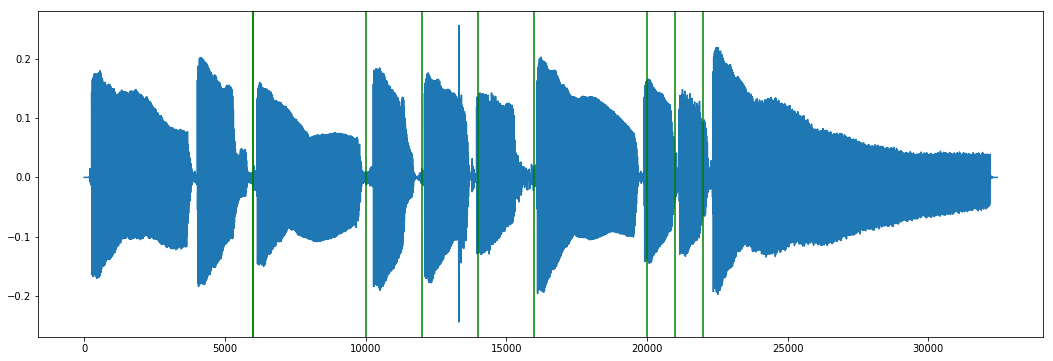

In [135]:
a,b,c = onset("../Samples/Guitar/Riffs/Guitar_noamp_riff1_12.mp3")

In [132]:
for i,j in zip(a,b):
    print(i,j)

250 1.0
350 1.0
450 0.526249885559082
550 0.9991866946220398
650 0.9990395903587341
750 0.9986546039581299
850 0.9971641898155212
950 0.9997068047523499
1050 0.9983013868331909
1150 0.9942284822463989
1250 0.9994187355041504
1350 0.9989436268806458
1450 0.9982115030288696
1550 0.9970882534980774
1650 0.9996603727340698
1750 0.997980535030365
1850 0.9951007962226868
1950 0.9980998635292053
2050 0.9989321827888489
2150 0.997108519077301
2250 0.996995210647583
2350 0.9993330836296082
2450 0.9978439807891846
2550 0.9956532716751099
2650 0.9880788922309875
2750 0.9980636239051819
2850 0.9957492351531982
2950 0.9961524605751038
3050 0.9979493021965027
3150 0.996086835861206
3250 0.9941216111183167
3350 0.9618499279022217
3450 0.9965174198150635
3550 0.992895781993866
3650 0.9940125346183777
3750 0.9584499597549438
3850 0.744592547416687
3950 0.30979666113853455
4050 0.3779657185077667
4150 0.933652400970459
4250 0.9986415505409241
4350 0.9932395219802856
4450 0.9981769323348999
4550 0.999773